# 🔷 Application 1: Graph Partitioning Using Laplacian Matrix

## Step 1: Defining the Cut Size

Given an undirected and unweighted graph with adjacency matrix $A = [A_{ij}]$, we want to **partition the graph into two groups** such that the number of edges between the groups is minimized.

$$
A_{ij} =
\begin{cases}
1 & \text{if there is an edge between node } i \text{ and } j \\
0 & \text{otherwise}
\end{cases}
$$

Let $R$ denote the **cut size** (i.e., number of edges between groups). Then:

$$
R = \frac{1}{2} \sum_{\substack{i,j \\ \text{in different groups}}} A_{ij}
$$

The $\frac{1}{2}$ compensates for double counting since $A$ is symmetric.



## Step 2: Introducing Partition Vector $s$

We define a vector $s = [s_1, s_2, \dots, s_n]$ to encode the group assignment:

$$
s_i =
\begin{cases}
+1 & \text{if node } i \text{ is in group 1} \\
-1 & \text{if node } i \text{ is in group 2}
\end{cases}
$$

Now consider the product $s_i s_j$:

- $s_i s_j = +1$ if nodes $i$ and $j$ are in the **same** group  
- $s_i s_j = -1$ if nodes $i$ and $j$ are in **different** groups

We use this to rewrite the group indicator function as:

$$
\frac{1}{2}(1 - s_i s_j) =
\begin{cases}
1 & \text{if } i, j \text{ are in different groups} \\
0 & \text{otherwise}
\end{cases}
$$

Thus, the cut size becomes:

$$
R = \frac{1}{2} \sum_{\substack{i,j \\ \text{in different groups}}} A_{ij}
= \frac{1}{4} \sum_{i,j} A_{ij}(1 - s_i s_j)
\quad \text{(Equation 1)}
$$



## Step 3: Expressing $R$ Using the Laplacian

We expand the formula:

$$
R = \frac{1}{4} \left( \sum_{i,j} A_{ij} - \sum_{i,j} A_{ij} s_i s_j \right)
$$

Let $k_i = \sum_j A_{ij}$ be the degree of node $i$.

Then, define the Laplacian matrix:

$$
L = D - A, \quad \text{where } L_{ij} = k_i \delta_{ij} - A_{ij}
$$

Let’s compute the quadratic form $s^T L s$:

$$
s^T L s = \sum_{i,j} s_i L_{ij} s_j = \sum_{i} k_i s_i^2 - \sum_{i,j} A_{ij} s_i s_j
$$

Since $s_i^2 = 1$, we have:

$$
s^T L s = \sum_i k_i - \sum_{i,j} A_{ij} s_i s_j
$$

So,

$$
R = \frac{1}{4} \left( \sum_{i,j} A_{ij} - \sum_{i,j} A_{ij} s_i s_j \right)
= \frac{1}{4} s^T L s
\quad \text{(Final Formula)}
$$

This equation connects **cut size** directly to the **graph Laplacian**.



## Step 4: Spectral Partitioning Approach

To minimize $R$, we minimize $s^T L s$.

We now invoke **spectral theory**. The Laplacian $L$ is real symmetric, so it has real eigenvalues:

$$
L v_k = \lambda_k v_k
$$

Let’s use the **Rayleigh quotient**:

$$
v_k^T L v_k = \lambda_k
$$

So if we choose $s = v_k$ (the $k$-th eigenvector), then:

$$
s^T L s = \lambda_k
$$

But the smallest eigenvalue $\lambda_1 = 0$ corresponds to the **constant vector** $s = [1, 1, \dots, 1]$ (i.e., no split).

To split the graph, we use the **second smallest eigenvalue** $\lambda_2$ and its corresponding eigenvector $v_2$, called the **Fiedler vector**.

### Final Spectral Partitioning Algorithm:

- Compute the **Laplacian matrix** $L = D - A$
- Compute its eigenvectors and eigenvalues
- Use the **signs of components of $v_2$** to assign nodes to group 1 ($+$) and group 2 ($-$)

This approach is called **Spectral Bisection** or **Spectral Clustering**.



## ✅ Summary of Key Formulas

- **Cut size with partition vector:**
  $$
  R = \frac{1}{4} \sum_{i,j} A_{ij}(1 - s_i s_j)
  $$

- **Using Laplacian:**
  $$
  R = \frac{1}{4} s^T L s
  $$

- **Rayleigh quotient:**
  $$
  s^T L s = \lambda \quad \text{if } s = v
  $$

- **Optimal partitioning:**  
  Use the **second smallest eigenvector** of $L$ (Fiedler vector) to divide the graph.


In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt 

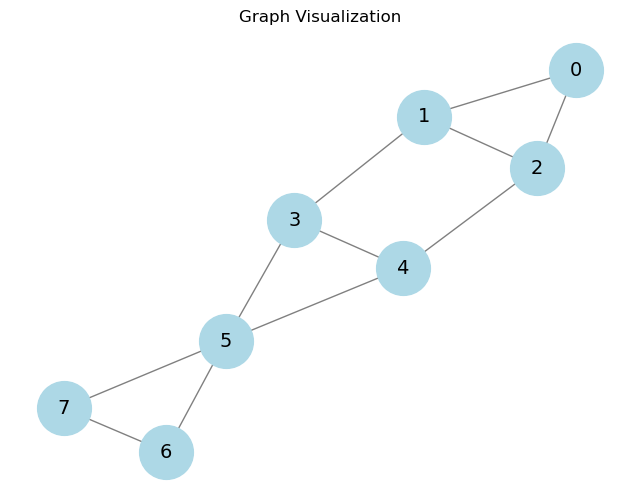

In [35]:
G = nx.Graph()
edges = [
    (0, 1), (0, 2), (1, 2), (1, 3),
    (2, 4), (3, 4), (3, 5), (4, 5),
    (5, 6), (5, 7), (6, 7)    
]

G.add_edges_from(edges)

pos = nx.spring_layout(G, seed=42)
plt.figure(figsize=(8, 6))
nx.draw_networkx(
    G,
    pos=pos,
    with_labels=True,
    node_color='lightblue',
    node_size=1500,
    font_size=14,
    edge_color='gray',
)

plt.axis('off')
plt.title("Graph Visualization")
plt.show()

In [10]:
node_list = list(range(8))
L = nx.laplacian_matrix(G, nodelist=node_list).toarray()

print(f'Laplassian Matrix: \n {L}')

Laplassian Matrix: 
 [[ 2 -1 -1  0  0  0  0  0]
 [-1  3 -1 -1  0  0  0  0]
 [-1 -1  3  0 -1  0  0  0]
 [ 0 -1  0  3 -1 -1  0  0]
 [ 0  0 -1 -1  3 -1  0  0]
 [ 0  0  0 -1 -1  4 -1 -1]
 [ 0  0  0  0  0 -1  2 -1]
 [ 0  0  0  0  0 -1 -1  2]]


In [21]:
eigenvalues, eigenvectors = np.linalg.eig(L)

print(f'Eigenvalues of L Matrix are: \n\n {np.round(eigenvalues, 3)}')
print('_' * 70)
print(f'Eigenvectores of L Matrix are: \n\n {np.round(eigenvectors, 3)}')

Eigenvalues of L Matrix are: 

 [5.191 3.577 1.736 0.    0.496 5.    3.    3.   ]
______________________________________________________________________
Eigenvectores of L Matrix are: 

 [[ 0.073 -0.623  0.527 -0.354  0.451  0.     0.    -0.   ]
 [-0.117  0.491  0.07  -0.354  0.339 -0.5   -0.5    0.001]
 [-0.117  0.491  0.07  -0.354  0.339  0.5    0.5   -0.001]
 [ 0.3   -0.151 -0.508 -0.354  0.059  0.5   -0.5    0.001]
 [ 0.3   -0.151 -0.508 -0.354  0.059 -0.5    0.5   -0.001]
 [-0.841 -0.253 -0.204 -0.354 -0.251 -0.     0.    -0.   ]
 [ 0.201  0.098  0.277 -0.354 -0.498  0.     0.    -0.707]
 [ 0.201  0.098  0.277 -0.354 -0.498  0.    -0.     0.707]]


In [29]:
idx = np.argsort(eigenvalues)
second_smallest_eigenvalue = eigenvalues[idx[1]]
second_eigenvector = eigenvectors[:, idx[1]]

print(f'2nd smallest eigenvector is: \n {second_smallest_eigenvalue}')
print('_' * 10)
print(f'fiedler vector is: \n {second_eigenvector}')

2nd smallest eigenvector is: 
 0.49649550106047236
__________
fiedler vector is: 
 [ 0.45124118  0.33922157  0.33922157  0.05877998  0.05877998 -0.25084561
 -0.49819934 -0.49819934]


In [31]:
group1 = [i for i in range(len(second_eigenvector)) if second_eigenvector[i] >= 0]
group2 = [i for i in range(len(second_eigenvector)) if second_eigenvector[i] < 0]

print(f'Class 1: {group1}')
print(f'Class 2: {group2}')

Class 1: [0, 1, 2, 3, 4]
Class 2: [5, 6, 7]


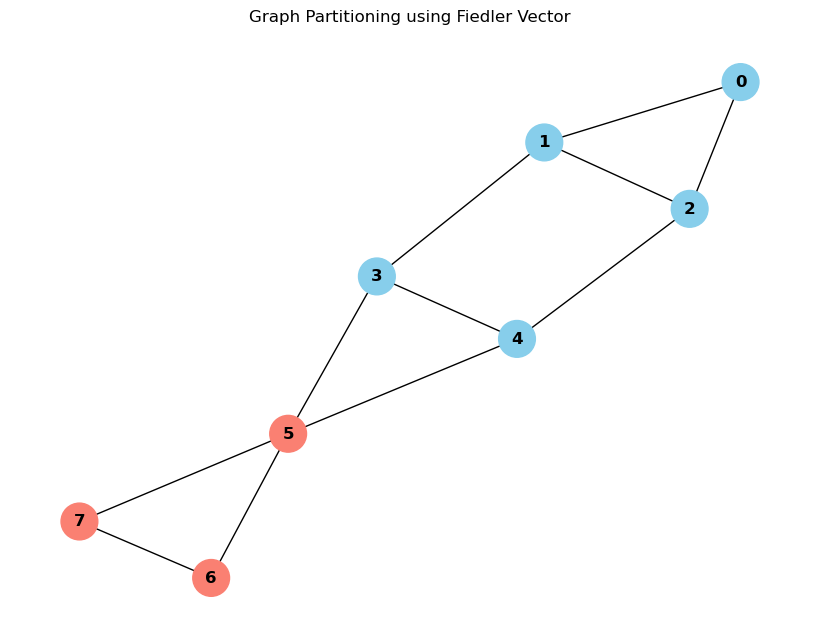

In [34]:
colors = ['skyblue' if i in group1 else 'salmon' for i in G.nodes]
pos = nx.spring_layout(G, seed=42)

plt.figure(figsize=(8, 6))
nx.draw(G, pos, with_labels=True, node_color=colors, node_size=700, font_weight='bold')
plt.title("Graph Partitioning using Fiedler Vector")
plt.show()


## 📌 Application 2: Graph Visualization

### 🔹 What makes a good graph layout?
A key feature of a good visualization is that **most graph edges appear short**. This reflects the idea that connected nodes should be drawn close to each other.



### 🔸 Visual Comparison:
- **Figure (a):** Vertices are placed randomly on the plane. Some edges are short, but many are long, making it hard to trace the graph’s structure.
- **Figure (b):** A new layout places **connected nodes close together**, so edge lengths are minimized. The result is a **clearer visualization** that reveals the structure of the graph more intuitively.

<p align="center">
  <img src="images/image1.png" alt="Image" width="600"/>
</p>


## 🎯 Mathematical Goal

We assume an unweighted, undirected graph. Let $x_i$ denote the x-coordinate (position) of node $i$. The goal is to **find node positions** on the screen that minimize the total squared edge lengths.

We define:

$$
\Delta^2 = \frac{1}{2} \sum_{ij} A_{ij}(x_i - x_j)^2
$$

Where:
- $A_{ij}$ is the adjacency matrix: $A_{ij} = 1$ if nodes $i$ and $j$ are connected, otherwise $0$
- The factor $\frac{1}{2}$ avoids double-counting symmetric pairs $(i,j)$ and $(j,i)$

Expanding the squared term:

$$
\Delta^2 = \frac{1}{2} \sum_{ij} A_{ij}(x_i^2 - 2x_ix_j + x_j^2)
$$

We now use:
- $\sum_j A_{ij} = k_i$ (degree of node $i$)
- $\delta_{ij}$ is the Kronecker delta

So we write:

$$
\Delta^2 = \sum_{ij} (k_i \delta_{ij} - A_{ij})x_ix_j = \sum_{ij} L_{ij} x_i x_j
$$

This is a **quadratic form**:

$$
\Delta^2 = x^T L x
$$

Where:
- $L = D - A$ is the Laplacian matrix of the graph
- $x$ is the vector of node coordinates



## 🧠 Intuition: Why Does This Work?

### ✅ Algebraic Connectivity and Visualization

- In graph visualization, we aim to **shorten the edge lengths**, which helps us reveal the graph structure better.
- If $\Delta^2$ is small, it means adjacent nodes are **close in space**.
- If the graph has **weakly connected components**, some edge lengths need to be **larger** to reflect this, which increases $\Delta^2$.
- Conversely, minimizing $\Delta^2$ spreads out the clusters appropriately.

### ✅ Best 2D Visualization: Use of Eigenvectors

- We solve $Lx = \lambda x$ and find the **eigenvectors** of $L$.
- The smallest eigenvalue is always $0$, with a constant vector as eigenvector.
- The **second smallest** eigenvalue corresponds to the direction with **least smooth variation** and gives the most meaningful spatial embedding.

### 🎯 Therefore, for 2D visualization:
- Use the **eigenvector corresponding to the second smallest eigenvalue** for the x-coordinate
- Use the **eigenvector corresponding to the third smallest eigenvalue** for the y-coordinate

This gives a layout that tends to **minimize the total squared edge lengths**.

🔧 Note: Although eigenvectors are not unique (they can be flipped or scaled), standard libraries like **NetworkX** use this exact method for graph layout.


In [38]:
pos

{0: array([0.71452547, 0.94307827]),
 1: array([0.2616569 , 0.70641639]),
 2: array([0.59704204, 0.44626728]),
 3: array([-0.12462495,  0.1814416 ]),
 4: array([ 0.19866666, -0.06329014]),
 5: array([-0.32935787, -0.43507615]),
 6: array([-0.50696203, -1.        ]),
 7: array([-0.81094623, -0.77883725])}

# Application 3: Random Walk and the Laplacian Matrix

## 🐜 Random Walk on a Graph 

Imagine a graph where a particle (or a walker) moves from one node to a neighboring node at each time step. The movement is **random**, and the choice is **uniformly distributed** among neighbors.

Let’s define:

- $p_i(t)$: Probability that the walker is at node $i$ at time $t$.
- $p(t)$: The column vector of all $p_i(t)$, for all nodes.
- $A$: Adjacency matrix of the graph.
- $D$: Degree matrix, where $D_{ii} = 	ext{deg}(i)$, and off-diagonal entries are zero.

<p align="center">
  <img src="images/image2.jpg" alt="Image" width="600"/>
</p>


### How is $p(t+1)$ calculated?

If the walker is at node $j$, it can move to any of its $k_j$ neighbors with equal probability $1/k_j$.

So the probability that node $i$ is visited at time $t+1$ is the sum over all neighbors $j$ of:



Which in matrix form is:

$$
\mathbf{p}(t+1) = A D^{-1} \mathbf{p}(t)
$$

This means:
- We multiply the current probability vector $\mathbf{p}(t)$ by the matrix $A D^{-1}$.
- This matrix is called the **random walk transition matrix**.



## ⏳ Stationary Distribution

Eventually, the probabilities stabilize. That is:

$$
\mathbf{p} = A D^{-1} \mathbf{p}
$$

This is called the **stationary distribution**. It does not change over time anymore.

We rewrite:

$$
(I - A D^{-1}) \mathbf{p} = 0
$$

And since:

$$
L = D - A \Rightarrow D^{-1} L = I - A D^{-1}
$$

We conclude:

$$
L D^{-1} \mathbf{p} = 0
$$



## 🧠 Role of the Laplacian

This shows that the stationary vector $\mathbf{p}$ lies in the **null space** of $L D^{-1}$.

In connected graphs, the stationary solution is:

$$
\mathbf{p} = a D \mathbf{1} \Rightarrow p_i = a k_i
$$

- The probability of being at node $i$ in the long run is **proportional to its degree**.
- $a$ is a normalization constant such that the total probability is 1:




## 📌 Summary

| Concept | Description |
|--------|-------------|
| **Random Walk Matrix** | $A D^{-1}$ |
| **Next-step Probability** | $\mathbf{p}(t+1) = A D^{-1} \mathbf{p}(t)$ |
| **Stationary Condition** | $\mathbf{p} = A D^{-1} \mathbf{p}$ |
| **Laplacian Relation** | $L D^{-1} \mathbf{p} = 0$ |
| **Stationary Distribution** | $p_i \propto k_i$ |
| **Meaning** | Nodes with higher degree are more likely to be visited in the long term. |

___